In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from collections import Counter

In [2]:
file_path = "new_new_speeches_output.csv"
df = pd.read_csv(file_path)
text_verbal_interjections_df = df[(df['Verbal interjection'] > 0) & (df['Paragraph'].str.len() > 0)]
text_verbal_interjections_df.loc[:, "Interjection Type"] = ""

C:\Users\hanna\AppData\Local\Temp\ipykernel_15428\2535195810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_verbal_interjections_df.loc[:, "Interjection Type"] = ""


In [3]:
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,Paragraph,Interjection,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,Interjection Type
21,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,8,Carsten Schneider,mp,männlich,SPD,Was?,True,Katrin Göring-Eckardt,weiblich,GRUENE,True,False,Zuruf,
34,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,13,Carsten Schneider,mp,männlich,SPD,Oh!,True,Unknown,NaN,CDU/CSU,True,False,Zuruf,
36,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,14,Carsten Schneider,mp,männlich,SPD,Warum habt ihr das bei Gerhard Schröder nicht ...,True,Volker Kauder,männlich,CDU/CSU,True,False,Zuruf,
52,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,3,Bernd Baumann,mp,männlich,AfD,Mir kommen die Tränen!,True,Unknown,NaN,FDP,True,False,Zuruf,
55,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,4,Bernd Baumann,mp,männlich,AfD,Zur Sache!,True,Unknown,NaN,FDP,True,False,Zuruf,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550687,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33055,1,Andreas Jung,mp,männlich,CDU/CSU,"Danke, SPD!",True,René Röspel,männlich,SPD,True,False,Zuruf,
550703,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,"Das ist ein Rechtsanspruch! Wer nicht will, mu...",True,Christine Lambrecht,weiblich,SPD,True,False,Zuruf,
550706,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,Das stimmt nicht!,True,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf,
550713,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,Die Mütter werden im Stich gelassen!,True,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf,


In [4]:
text_verbal_interjections_df.loc[:, 'Num. Interjection'] = range(1, len(text_verbal_interjections_df) + 1)

C:\Users\hanna\AppData\Local\Temp\ipykernel_15428\3103045424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_verbal_interjections_df.loc[:, 'Num. Interjection'] = range(1, len(text_verbal_interjections_df) + 1)


In [5]:
def preprocess_text(text):
    '''lowercase, tokenize, remove punctuation'''
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    return tokens
#

In [6]:
text_verbal_interjections_df.loc[:, "Token"] = text_verbal_interjections_df["Paragraph"].apply(preprocess_text)
text_verbal_interjections_df.loc[:, 'Num Tokens'] = text_verbal_interjections_df['Token'].apply(len)

C:\Users\hanna\AppData\Local\Temp\ipykernel_15428\1112413458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_verbal_interjections_df.loc[:, "Token"] = text_verbal_interjections_df["Paragraph"].apply(preprocess_text)
C:\Users\hanna\AppData\Local\Temp\ipykernel_15428\1112413458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_verbal_interjections_df.loc[:, 'Num Tokens'] = text_verbal_interjections_df['Token'].apply(len)


In [7]:
text_verbal_interjections_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,Interjection Type,Num. Interjection,Token,Num Tokens
21,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,8,Carsten Schneider,mp,männlich,SPD,...,Katrin Göring-Eckardt,weiblich,GRUENE,True,False,Zuruf,,1,[was],1
34,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,13,Carsten Schneider,mp,männlich,SPD,...,Unknown,NaN,CDU/CSU,True,False,Zuruf,,2,[oh],1
36,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,14,Carsten Schneider,mp,männlich,SPD,...,Volker Kauder,männlich,CDU/CSU,True,False,Zuruf,,3,"[warum, habt, ihr, das, bei, gerhard, schröder...",9
52,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,3,Bernd Baumann,mp,männlich,AfD,...,Unknown,NaN,FDP,True,False,Zuruf,,4,"[mir, kommen, die, tränen]",4
55,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,2,4,Bernd Baumann,mp,männlich,AfD,...,Unknown,NaN,FDP,True,False,Zuruf,,5,"[zur, sache]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550687,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33055,1,Andreas Jung,mp,männlich,CDU/CSU,...,René Röspel,männlich,SPD,True,False,Zuruf,,73763,"[danke, spd]",2
550703,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,4,Götz Frömming,mp,männlich,AfD,...,Christine Lambrecht,weiblich,SPD,True,False,Zuruf,,73764,"[das, ist, ein, rechtsanspruch, wer, nicht, wi...",9
550706,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,5,Götz Frömming,mp,männlich,AfD,...,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf,,73765,"[das, stimmt, nicht]",3
550713,BT_19_239.xml,19,2021-09-07,Beratung der Beschlussempfehlung des Ausschuss...,33056,10,Götz Frömming,mp,männlich,AfD,...,Dr. Silke Launert,weiblich,CDU/CSU,True,False,Zuruf,,73766,"[die, mütter, werden, im, stich, gelassen]",6


In [8]:
subset_df = text_verbal_interjections_df.sample(frac=1/7, random_state=42).reset_index(drop=True)

In [9]:
subset_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,Interjection Type,Num. Interjection,Token,Num Tokens
0,BT_19_127.xml,19,2019-11-14,"Antrag der Abgeordneten Sevim Dağdelen, Heike ...",16774,4,Hansjörg Müller,mp,männlich,AfD,...,Unknown,NaN,GRUENE,True,False,Zuruf,,39931,[oah],1
1,BT_19_193.xml,19,2020-11-20,"a) Antrag der Abgeordneten Rüdiger Lucassen, M...",26006,1,Tobias Pflüger,mp,männlich,DIE LINKE,...,Helin Evrim Sommer,weiblich,DIE LINKE,True,False,Zuruf,,61091,"[sonst, machen, die, ja, nichts]",5
2,BT_19_172.xml,19,2020-09-09,Erste Beratung des von der Bundesregierung ein...,22982,13,Sebastian Brehm,mp,männlich,CDU/CSU,...,Christian Dürr,männlich,FDP,True,False,Zuruf,,54783,"[nein, das, war, die, union]",5
3,BT_19_061.xml,19,2018-11-08,"Antrag der Abgeordneten Filiz Polat, Luise Amt...",7822,7,Thorsten Frei,mp,männlich,CDU/CSU,...,Beatrix von Storch,weiblich,AfD,True,False,Zuruf,,17316,"[punkte, die, sie, ablehnen, sagen, sie, doch,...",11
4,BT_19_112.xml,19,2019-09-12,Unknown,14666,3,Rüdiger Kruse,mp,männlich,CDU/CSU,...,Oliver Luksic,männlich,FDP,True,False,Zuruf,,34437,"[das, hat, sich, auch, geändert]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,BT_19_061.xml,19,2018-11-08,"Antrag der Abgeordneten Filiz Polat, Luise Amt...",7812,9,Frank Steffel,mp,männlich,CDU/CSU,...,Jürgen Braun,männlich,AfD,True,False,Zuruf,,17278,"[hören, sie, doch, auf, mit, dem, unsinn]",7
10534,BT_19_063.xml,19,2018-11-20,Unknown,8156,4,Otto Fricke,mp,männlich,FDP,...,Unknown,NaN,CDU/CSU,True,False,Zuruf,,18234,[oh],1
10535,BT_19_119.xml,19,2019-10-18,Beschlussempfehlung und Bericht des Ausschusse...,15573,10,Jens Zimmermann,mp,männlich,SPD,...,Manuel Höferlin,männlich,FDP,True,False,Zuruf,,36527,[54],1
10536,BT_19_204.xml,19,2021-01-14,Erste Beratung des von den Abgeordneten Markus...,27531,7,Sebastian Brehm,mp,männlich,CDU/CSU,...,Stefan Liebich,männlich,DIE LINKE,True,False,Zuruf,,64296,"[aber, da, gab, es, doch, eine, vermögensteuer]",7


In [10]:
restored_df = subset_df.sort_values('Num. Interjection').reset_index(drop=True)

In [11]:
restored_df

,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,Interjection Type,Num. Interjection,Token,Num Tokens
0,BT_19_002.xml,19,2017-11-21,"a) Antrag der Fraktionen CDU/CSU, SPD, AfD, FD...",19,7,Jan Korte,mp,männlich,DIE LINKE,...,Michael Grosse-Brömer,männlich,CDU/CSU,True,False,Zuruf,,36,"[mach, ich, nie]",3
1,BT_19_002.xml,19,2017-11-21,"a) Antrag der Fraktionen CDU/CSU, SPD, AfD, FD...",19,10,Jan Korte,mp,männlich,DIE LINKE,...,Michael Grosse-Brömer,männlich,CDU/CSU,True,False,Zuruf,,40,"[machen, wir, keine, sorge]",4
2,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,42,3,Marie-Agnes Strack-Zimmermann,mp,weiblich,FDP,...,Dr. Volker Ullrich,männlich,CDU/CSU,True,False,Zuruf,,71,"[wo, ist, denn, frau, wagenknecht, heute]",6
3,BT_19_002.xml,19,2017-11-21,Antrag der Bundesregierung: Fortsetzung der Be...,52,7,Tobias Pflüger,mp,männlich,DIE LINKE,...,Henning Otte,männlich,CDU/CSU,True,False,Zuruf,,84,"[also, zustimmung]",2
4,BT_19_002.xml,19,2017-11-21,Aktuelle Stunde auf Verlangen der Fraktion der...,59,3,Tino Chrupalla,mp,männlich,AfD,...,Thomas Jurk,männlich,SPD,True,False,Zuruf,,89,"[so, ein, quatsch]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,19,Paul Ziemiak,mp,männlich,CDU/CSU,...,Yasmin Fahimi,weiblich,SPD,True,False,Zuruf,,73725,"[jetzt, kommt, der, abgesang]",4
10534,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,22,Paul Ziemiak,mp,männlich,CDU/CSU,...,Yasmin Fahimi,weiblich,SPD,True,False,Zuruf,,73726,"[sie, sind, doch, gar, nicht, in, der, lage, d...",20
10535,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33023,38,Paul Ziemiak,mp,männlich,CDU/CSU,...,Claudia Müller,weiblich,GRUENE,True,False,Zuruf,,73733,"[warum, lügen, sie, hier]",4
10536,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33025,9,Yasmin Fahimi,mp,weiblich,SPD,...,Thorsten Frei,männlich,CDU/CSU,True,False,Zuruf,,73742,"[ja, wer, ist, denn, zuständig]",5


In [12]:
token_overall = text_verbal_interjections_df["Num Tokens"].sum()
num_interjections = len(text_verbal_interjections_df)

print(f"Each interjection consists of on average {token_overall/num_interjections} tokens")

Each interjection consists of on average 5.422858459744872 tokens


In [13]:
### Women

In [14]:
female_interjectors = text_verbal_interjections_df[text_verbal_interjections_df['Interjector Gender'] == "weiblich"]

token_overall = female_interjectors["Num Tokens"].sum()
num_interjections = len(female_interjectors)

print(f"Each interjection by a woman consists of on average {token_overall/num_interjections} tokens")

Each interjection by a woman consists of on average 5.4309218485361725 tokens


In [15]:
## Men
male_interjectors = text_verbal_interjections_df[text_verbal_interjections_df['Interjector Gender'] == "männlich"]

token_overall = male_interjectors["Num Tokens"].sum()
num_interjections = len(male_interjectors)

print(f"Each interjection by a man consists of on average {token_overall/num_interjections} tokens")

Each interjection by a man consists of on average 5.6996389285414395 tokens


In [16]:
## unknown
unknown_interjectors = text_verbal_interjections_df[text_verbal_interjections_df['Interjector Gender'].isna()]

token_overall = unknown_interjectors["Num Tokens"].sum()
num_interjections = len(unknown_interjectors)

print(f"Each interjection by unknown gender consists of on average {token_overall/num_interjections} tokens")

Each interjection by unknown gender consists of on average 2.9802414928649834 tokens


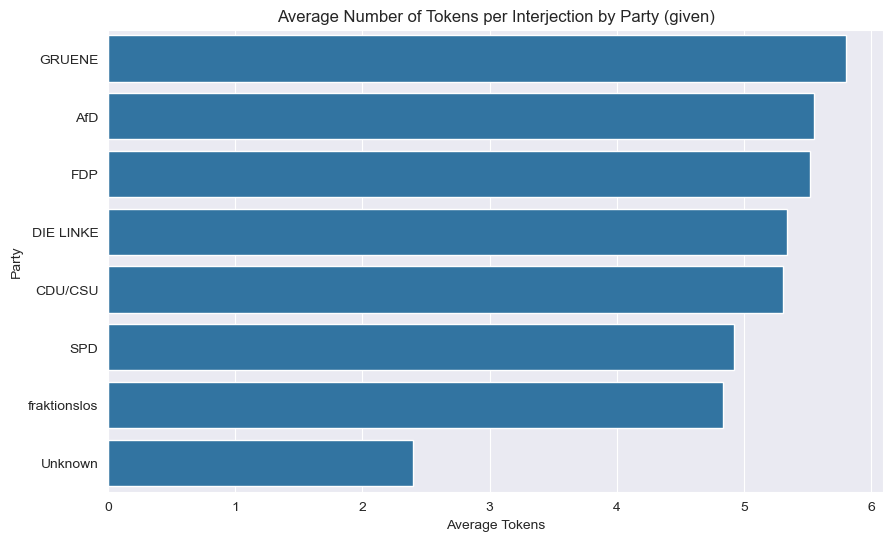

In [17]:
unique_parties = text_verbal_interjections_df['Interjector Party'].unique()

party_avg_tokens = []

for party in unique_parties:
    party_interjectors = text_verbal_interjections_df[text_verbal_interjections_df['Interjector Party'] == party]

    token_overall = party_interjectors["Num Tokens"].sum()
    num_interjections = len(party_interjectors)

    if num_interjections > 0:
        avg_tokens = token_overall / num_interjections
        party_avg_tokens.append((party, avg_tokens))
    else:
        party_avg_tokens.append((party, 0))

party_avg_df = pd.DataFrame(party_avg_tokens, columns=['Party', 'Avg Tokens'])

# sort
party_avg_df = party_avg_df.sort_values(by='Avg Tokens', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg Tokens', y='Party', data=party_avg_df)

plt.title('Average Number of Tokens per Interjection by Party (given)')
plt.xlabel('Average Tokens')
plt.ylabel('Party')
plt.show()

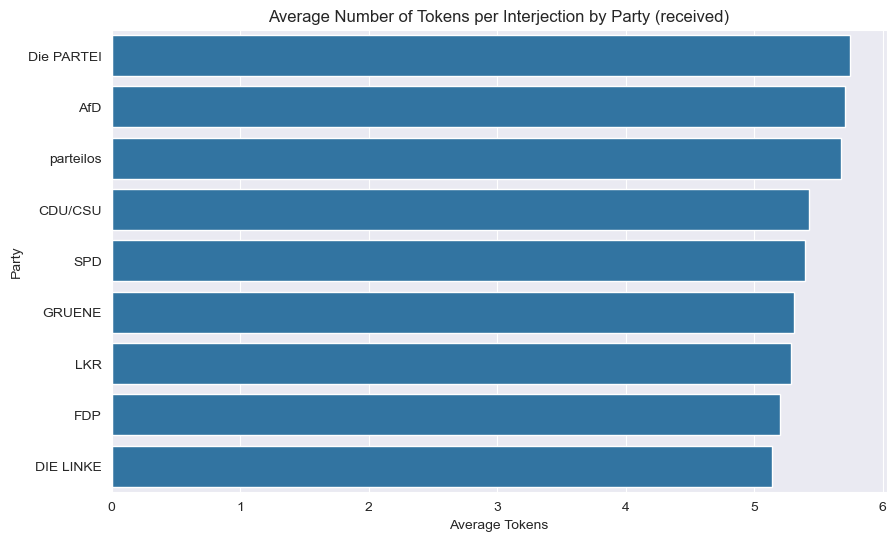

In [18]:
unique_parties = text_verbal_interjections_df['Party'].unique()

party_avg_tokens = []

for party in unique_parties:
    party_interjectors = text_verbal_interjections_df[text_verbal_interjections_df['Party'] == party]

    token_overall = party_interjectors["Num Tokens"].sum()
    num_interjections = len(party_interjectors)

    if num_interjections > 0:
        avg_tokens = token_overall / num_interjections
        party_avg_tokens.append((party, avg_tokens))
    else:
        party_avg_tokens.append((party, 0))

party_avg_df = pd.DataFrame(party_avg_tokens, columns=['Party', 'Avg Tokens'])

# sort
party_avg_df = party_avg_df.sort_values(by='Avg Tokens', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg Tokens', y='Party', data=party_avg_df)

plt.title('Average Number of Tokens per Interjection by Party (received)')
plt.xlabel('Average Tokens')
plt.ylabel('Party')
plt.show()

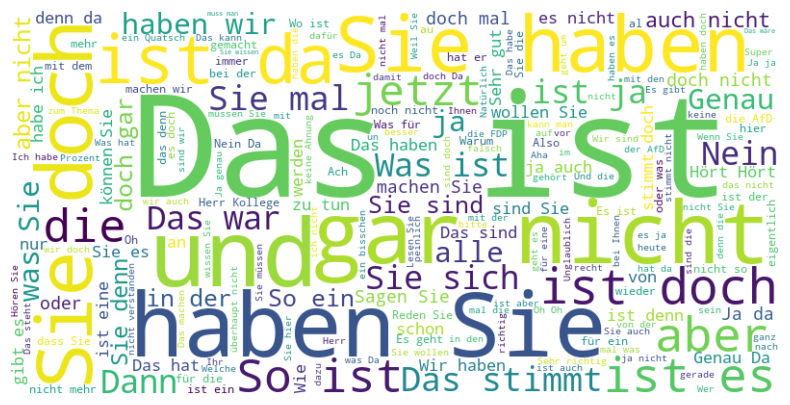

In [19]:
text_data = ' '.join(text_verbal_interjections_df['Paragraph'])

# Generate the word cloud
wordcloud = WordCloud(stopwords='german', background_color='white', width=800, height=400).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [20]:
tokens = text_verbal_interjections_df["Token"].tolist()
flattened_tokens = [token.lower() for sublist in tokens for token in sublist]
filtered_tokens = [token for token in flattened_tokens if token not in string.punctuation]
token_counts = Counter(filtered_tokens)
print(token_counts)

Counter({'das': 20146, 'sie': 17974, 'ist': 12712, 'nicht': 10831, 'die': 10116, 'doch': 6714, 'ja': 6120, 'es': 6035, 'der': 5708, 'was': 5481, 'wir': 5184, 'haben': 4972, 'so': 4129, 'auch': 3952, 'mal': 3494, 'aber': 3246, 'ein': 3163, 'sind': 3131, 'da': 3121, 'denn': 2929, 'in': 2794, 'ich': 2721, 'und': 2665, 'hat': 2549, 'zu': 2466, 'den': 2402, 'mit': 2287, 'eine': 2241, 'herr': 2034, 'genau': 2010, 'jetzt': 1970, 'für': 1948, 'noch': 1896, 'sich': 1831, 'gar': 1811, 'machen': 1737, 'war': 1732, 'von': 1717, 'dann': 1713, 'schon': 1699, 'wie': 1693, 'nein': 1646, 'ihr': 1538, 'keine': 1497, 'richtig': 1447, 'gut': 1415, 'nichts': 1412, 'stimmt': 1388, 'man': 1355, 'sehr': 1347, 'er': 1317, 'nur': 1279, 'sagen': 1277, 'oh': 1267, 'bei': 1264, 'im': 1236, 'wollen': 1233, 'auf': 1231, 'ihnen': 1164, 'können': 1133, 'geht': 1125, 'oder': 1106, '“': 1050, '„': 1048, 'hört': 1041, 'reden': 1035, 'an': 1016, 'dass': 1014, 'ihre': 1003, 'mehr': 988, 'hier': 979, 'quatsch': 975, 'wo': 9

In [21]:
tokens = text_verbal_interjections_df["Paragraph"].tolist()
token_counts = Counter(tokens)

In [22]:
sorted_token_counts = {key: value for key, value in sorted(token_counts.items(), key=lambda item: item[1], reverse=False)}

# Print the sorted dictionary
print(sorted_token_counts)

{'Warum habt ihr das bei Gerhard Schröder nicht gemacht?': 1, 'Traditionen wollten Sie doch direkt brechen!': 1, 'Rabulisten!': 1, 'Wie viel haben Sie denn verloren?': 1, 'Wer kontrolliert denn die?': 1, 'Müssen wir aber!': 1, 'Was ist denn mit dem Petitionsrecht?': 1, 'Es gibt kein Ministerium für die Opposition, Herr Kollege!': 1, 'Gucken Sie mal in das Grundgesetz!': 1, 'Ja, das habe ich mich auch gefragt!': 1, 'Das passiert, wenn man das nicht ordentlich vorbereitet!': 1, 'Ihr habt noch keinen Koalitionsvertrag!': 1, 'Weil es im Grundgesetz steht!': 1, 'Das können wir doch ergänzen!': 1, 'Ihr seid noch nicht an der Regierung! Noch nicht!': 1, 'Der ist ja erst später dazugekommen!': 1, 'Doch! Ist es! Sie können ja eine Änderung beantragen!': 1, 'Kann man nicht! Geht ja nicht!': 1, 'Da sind wir aber jetzt gespannt!': 1, 'Mach ich nie!': 1, 'Jetzt verstehe ich Ihren Antrag!': 1, 'Das ist doch eine Übergangsregelung!': 1, 'Machen wir! Keine Sorge!': 1, 'Nur von Ihnen!': 1, 'Auch der Ge

In [23]:
len(sorted_token_counts)

55356

In [24]:
question_paragraphs = text_verbal_interjections_df[text_verbal_interjections_df['Paragraph'].str.contains('\?', regex=True)]
question_paragraphs

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\hanna\AppData\Local\Temp\ipykernel_15428\1493429099.py:1: SyntaxWarning: invalid escape sequence '\?'
  question_paragraphs = text_verbal_interjections_df[text_verbal_interjections_df['Paragraph'].str.contains('\?', regex=True)]


,Filename,Period,Date,Item,Speech #,Paragraph #,Speaker,Role,Gender,Party,...,Interjector,Interjector Gender,Interjector Party,Verbal interjection,Nonverbal interjection,Interjection type,Interjection Type,Num. Interjection,Token,Num Tokens
21,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,8,Carsten Schneider,mp,männlich,SPD,...,Katrin Göring-Eckardt,weiblich,GRUENE,True,False,Zuruf,,1,[was],1
36,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,1,14,Carsten Schneider,mp,männlich,SPD,...,Volker Kauder,männlich,CDU/CSU,True,False,Zuruf,,3,"[warum, habt, ihr, das, bei, gerhard, schröder...",9
124,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,4,1,Michael Grosse-Brömer,mp,männlich,CDU/CSU,...,Ulli Nissen,weiblich,SPD,True,False,Zuruf,,10,"[wie, viel, haben, sie, denn, verloren]",6
148,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,4,11,Michael Grosse-Brömer,mp,männlich,CDU/CSU,...,Matthias W. Birkwald,männlich,DIE LINKE,True,False,Zuruf,,15,"[wer, kontrolliert, denn, die]",4
157,BT_19_001.xml,19,2017-10-24,Beschlussfassung über die,4,15,Michael Grosse-Brömer,mp,männlich,CDU/CSU,...,Dr. Petra Sitte,weiblich,DIE LINKE,True,False,Zuruf,,18,"[was, ist, denn, mit, dem, petitionsrecht]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550376,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33025,9,Yasmin Fahimi,mp,weiblich,SPD,...,Thorsten Frei,männlich,CDU/CSU,True,False,Zuruf,,73742,"[ja, wer, ist, denn, zuständig]",5
550391,BT_19_239.xml,19,2021-09-07,Vereinbarte Debatte zur Situation in Deutschland,33025,17,Yasmin Fahimi,mp,weiblich,SPD,...,Thorsten Frei,männlich,CDU/CSU,True,False,Zuruf,,73743,"[sie, sind, aber, nicht, mehr, generalsekretär...",7
550453,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33031,5,Wolfgang Kubicki,mp,männlich,FDP,...,Beifall bei der FDP -Thorsten Frei,NaN,CDU/CSU,True,False,Zuruf,,73747,"[und, was, ist, mit, den, 9, millionen, kindern]",8
550506,BT_19_239.xml,19,2021-09-07,a) Zweite und dritte Beratung des von den Frak...,33033,5,Sven-Christian Kindler,mp,männlich,GRUENE,...,Mechthild Rawert,weiblich,SPD,True,False,Zuruf,,73750,"[und, was, macht, der, herr, kretschmann]",6


### Types of interjections:
#### Memoranda:

- dienen dazu, den Redner (bzw. das Plenum) an nach Ansicht des Zurufers bisher unberücksichtigt gebliebene Aspekte oder Argumente zu erinnern und zum Eingehen auf das Zugerufene zu drängen
- auch rhetorische Fragen

<p>Sicherheit ist auch der Kampf gegen Rechtsextremismus. Das ist die größte Bedrohung in diesem Land.</p>
<stage type="interjection">(Jan Korte [DIE LINKE]: NSU!)</stage>
<p>– Ich weiß nicht, ob Sie das bestreiten, Herr Korte. Aber der Rechtsterrorismus ist die größte Gefahr in diesem Land, weil er Anschläge auf Menschen verübt.</p>
<stage type="interjection">(Dr. Joe Weingarten [SPD]: Deswegen haben Sie Herrn Maaßen auf der Liste!)</stage>
<p>NSU – das war ein Staatsversagen ohne jeden Zweifel.</p>
<stage type="interjection">(Dr. Joe Weingarten [SPD]: Was ist mit Herrn Maaßen?)</stage>
<p>Hier brauchen wir klare Regeln.</p>
<p>Gleichzeitig haben wir inzwischen auch einen fundamentalistischen Terrorismus,</p>
<stage type="interjection">(Dr. Joe Weingarten [SPD]: Was ist mit Herrn Maaßen?)</stage>
<p>wir haben Clankriminalität, die die Menschen verunsichert. Deshalb muss man das anpacken. Dazu braucht man eine Haltung, eine klare Haltung.</p>
<stage type="interjection">(Dr. Joe Weingarten [SPD]: Maaßen!)</stage>
<p>Wir haben das in Nordrhein-Westfalen erlebt.</p>


####  Affirmativa:

- Formen vollständiger oder teilweiser Zustimmung

<stage type="interjection">(Beifall bei der FDP)</stage>
<p>Und deshalb war es richtig, dass in der Vergangenheit – so viel Lob an CDU und CSU – bei den Ausbauzielen auch auf den Preis geachtet wurde.</p>
<p>Dass „German Engineered Klimaschutz“ funktioniert, zeigt, nebenbei gesagt, die IAA. Die deutsche Schlüsselindustrie hat sich längst für ihre Zukunftsaufgaben aufgestellt. Mit innovativen und sauberen Produkten werden wir auch in Zukunft das Autoland Nummer eins sein können. Deshalb braucht diese Industrie mit ihren Milliarden an Gewinnen nicht mehr die Subventionen, die nahezu alle Fraktionen dieses Hauses unverändert ins Schaufenster stellen. Um es klar zu sagen: Es ist absurd, dass der deutsche Steuerzahler auch die E-Autos für Gutverdiener über den Lebenszyklus mit bis zu 20 000 Euro fördert,</p>
<stage type="interjection">(Dr. Dietmar Bartsch [DIE LINKE]: Das stimmt!)</stage>


#### Erotetika:

- echte Informationsfragen


<sp who="Thomas Sattelberger" name="Thomas Sattelberger" role="mp" parliamentary_group="FDP" party="FDP">
<speaker>Dr. h. c. Thomas Sattelberger (FDP):</speaker>
<p>Gerne. – Liebe Kollegin, das war für mich gerade eine Wischiwaschi-Frage. Ich habe Fokus gehalten. Ich habe eine sehr klare Forderung gestellt zum Thema Schulpolitik.</p>
<stage type="interjection">(Steffi Lemke [BÜNDNIS 90/DIE GRÜNEN]: Es geht um Lindner!)</stage>
<p>Ich möchte, dass die KMK zusammenkommt.</p>
<stage type="interjection">(Dr. Manuela Rottmann [BÜNDNIS 90/DIE GRÜNEN]: Maskenpflicht: Ja oder nein?)</stage>
<p>Wir haben klare Forderungen dazu, dass wir die epidemische Lage von nationaler Tragweite so nicht weiter mittragen wollen.</p>
<stage type="interjection">(Steffi Lemke [BÜNDNIS 90/DIE GRÜNEN]: Das war nicht die Frage!)</stage>
<p>Ich verstehe nicht, wo Ihr Problem liegt.</p>
<stage type="interjection">(Beifall bei Abgeordneten der FDP – Dr. Manuela Rottmann [BÜNDNIS 90/DIE GRÜNEN]: Maskenpflicht: Ja oder nein?)</stage>



####  Direktiva:

-  Forderungen und Aufforderungen

<p>Europa ist aber nicht nur ein Freiheitsversprechen; Europa ist auch ein Mobilitätsversprechen.</p>
<stage type="interjection">(Dr. Franziska Brantner [BÜNDNIS 90/DIE GRÜNEN]: Ja, dann machen Sie mal was dafür!)</stage>



####  Dissentiva:

- Mittel des Ausdrucks von Ablehnung.

<stage type="interjection">(Zuruf der Abg. Ulli Nissen [SPD])</stage>
<p>Dagegen ist grundsätzlich natürlich nichts zu sagen. Für uns ist das auch vollkommen in Ordnung. Was wir aber kritisieren, ist, dass Sie die Wahlfreiheit weiter aushöhlen, die ja nach dem Grundgesetz den Eltern zusteht. Hier greift der Staat einmal mehr in die Kompetenzen der Eltern ein,</p>
<stage type="interjection">(Christine Lambrecht [SPD]: Das ist ein Rechtsanspruch! Wer nicht will, muss nicht!)</stage>
<p>indem er ihnen diese Entscheidung abnehmen will und nur ein bestimmtes Betreuungsmodell, nämlich das staatliche, fördern will.</p>
<stage type="interjection">(Beifall bei der AfD – Dr. Silke Launert [CDU/CSU]: Das stimmt nicht!)</stage>



#### Evaluativa:

- moralische Wertungen und inhaltliche sowie persönliche Abqualifikationen.

<stage type="interjection">(Armin-Paulus Hampel [AfD]: Ist ja gar nicht drin! Da steht „Syrien“!)</stage>
<p>– Mit diesem Verbrecher gibt es keine normalen Beziehungen, Herr Hampel; das müssen Sie mal lernen.</p>
<stage type="interjection">(Beifall bei Abgeordneten der CDU/CSU – Martin Reichardt [AfD]: Wir müssen von Ihnen gar nichts lernen!)</stage>